<a href="https://colab.research.google.com/github/alessandropessoa/ciencia-de-Dados/blob/main/clusteres_nao_esfericos_kmeans_kmedoids_hclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
!pip install pyclustering  seaborn

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering


from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
import random

In [191]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances

In [192]:
# dados não esféricos
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)


In [193]:
X

array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523],
       [ 1.25490304, -0.48343549],
       [ 1.05385133, -0.44269047],
       [ 0.03137971,  1.05301203],
       [ 0.62054473,  0.71309598],
       [ 1.7876566 , -0.14295878],
       [ 0.99907493,  0.09180641],
       [-0.70723041,  0.57499903],
       [ 1.46479643, -0.47111862],
       [ 0.42712245,  0.83103216],
       [ 1.05341942, -0.50102941],
       [ 1.19597671, -0.49472393],
       [ 1.99422286,  0.42426007],
       [ 0.93175527,  0.39426183],
       [ 0.41104275, -0.33348189],
       [ 1.49073255, -0.38560138],
       [ 1.97517181,  0.35930615],
       [ 2.0470942 ,  0.41068552],
       [-0.00592133,  0.14862165],
       [ 0.82592072, -0.42998975],
       [ 0.54309448,  0.75144817],
       [ 1.8709548 ,  0.20141701],
       [ 1.9224317 ,  0.43263225],
       [-0.86765136,  0.45505598],
       [ 0.28216036,

In [194]:
X = StandardScaler().fit_transform(X)

In [195]:
# DataFrame para visualização
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df['Label Verdadeiro'] = y_true

In [196]:
df

,Feature 1,Feature 2,Label Verdadeiro
0,0.375125,-1.403679,1
1,0.226815,1.135628,0
2,0.595442,-1.493710,1
3,-0.944918,1.409748,0
4,-0.243115,1.618062,0
...,...,...,...
495,-0.304636,1.474047,0
496,-0.497472,-0.133542,1
497,0.098642,-1.238718,1
498,1.282741,-1.074231,1


In [197]:
df.groupby('Label Verdadeiro').size()

,0
Label Verdadeiro,
0,250
1,250


# Pairplot dos dados

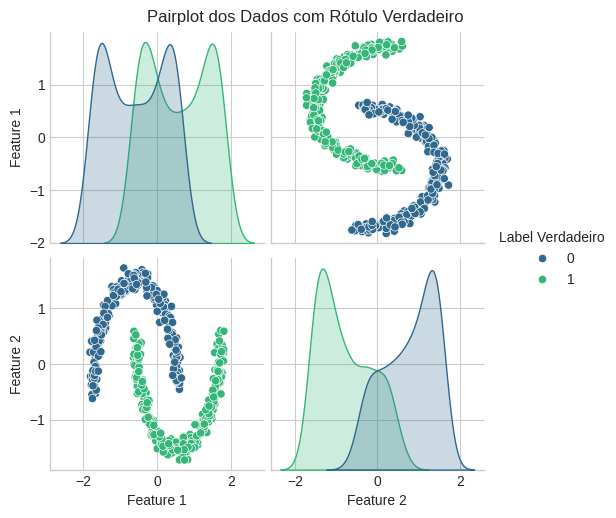

In [198]:
sns.pairplot(df, hue='Label Verdadeiro', palette='viridis')
plt.suptitle("Pairplot dos Dados com Rótulo Verdadeiro", y=1.02)
plt.show()

## Função para rodar K-Medoids com distância Manhattan

In [199]:

def rodar_kmedoids_pyclustering(X, k):
    metric = distance_metric(type_metric.MANHATTAN)
    initial_medoids = random.sample(range(len(X)), k)
    kmedoids_instance = kmedoids(X.tolist(), initial_medoids, metric=metric)
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    labels = np.zeros(len(X), dtype=int)
    for cluster_id, indices in enumerate(clusters):
        labels[indices] = cluster_id
    return labels

## Avalia k entre 2 e 7

In [200]:

ks = range(2, 8)
inercia_kmeans = []
sil_kmeans = []
db_kmeans = []

sil_kmedoids = []
db_kmedoids = []

sil_hclust = []
db_hclust = []

In [201]:
for k in ks:
    # KMeans
    km = KMeans(n_clusters=k, random_state=42)
    km_labels = km.fit_predict(X)
    inercia_kmeans.append(km.inertia_)
    sil_kmeans.append(silhouette_score(X, km_labels))
    db_kmeans.append(davies_bouldin_score(X, km_labels))

    # KMedoids
    kmd_labels = rodar_kmedoids_pyclustering(X, k)
    sil_kmedoids.append(silhouette_score(X, kmd_labels))
    db_kmedoids.append(davies_bouldin_score(X, kmd_labels))

    # Agglomerative Clustering (Hierárquico)
    hclust = AgglomerativeClustering(n_clusters=k, linkage='average', metric='euclidean')
    hclust_labels = hclust.fit_predict(X)
    sil_hclust.append(silhouette_score(X, hclust_labels))
    db_hclust.append(davies_bouldin_score(X, hclust_labels))

## Plot das métricas comparativas

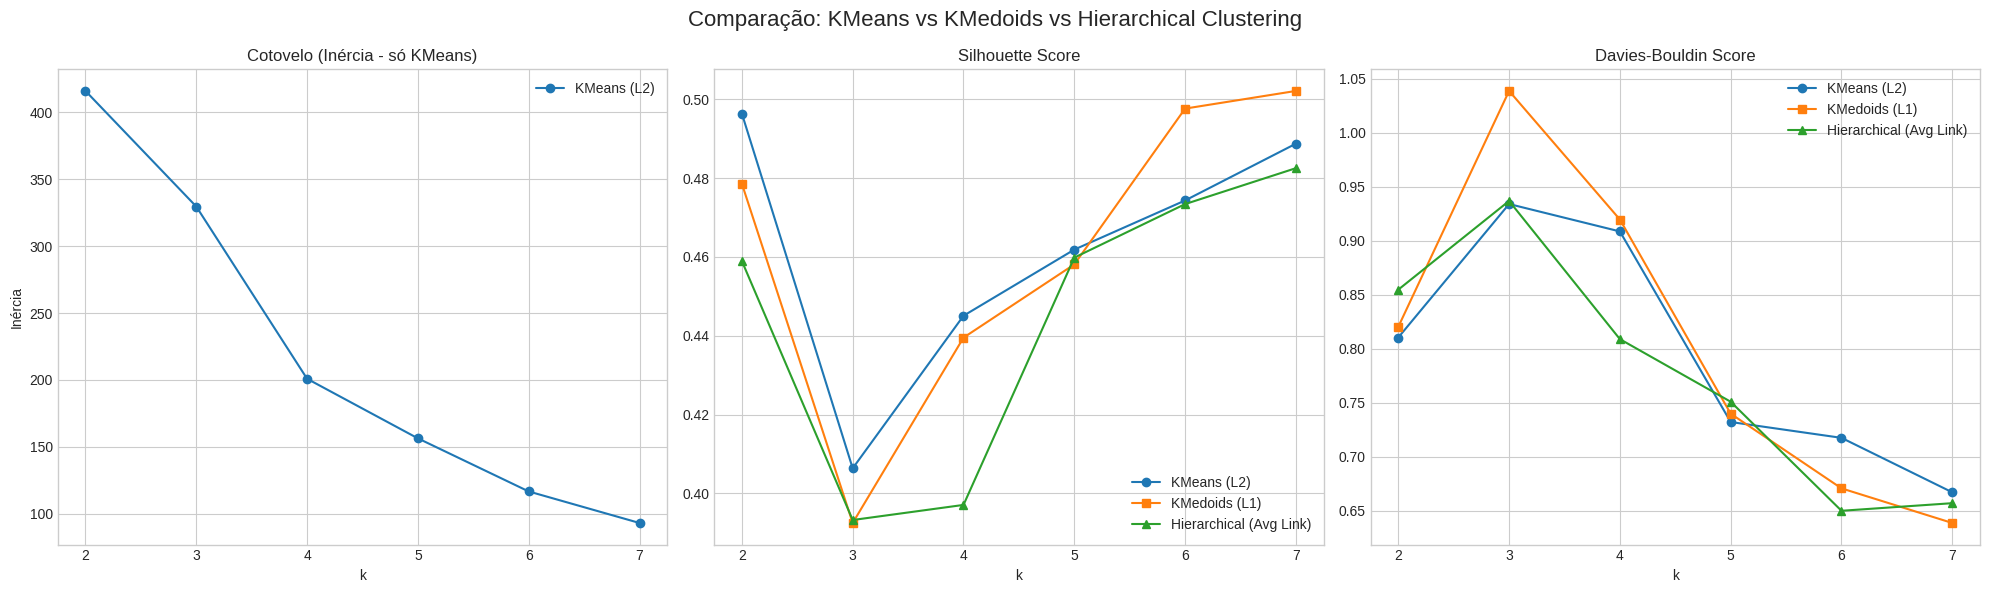

In [202]:

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].plot(ks, inercia_kmeans, marker='o', label='KMeans (L2)')
axs[0].set_title('Cotovelo (Inércia - só KMeans)')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Inércia')
axs[0].legend()

axs[1].plot(ks, sil_kmeans, marker='o', label='KMeans (L2)')
axs[1].plot(ks, sil_kmedoids, marker='s', label='KMedoids (L1)')
axs[1].plot(ks, sil_hclust, marker='^', label='Hierarchical (Avg Link)')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('k')
axs[1].legend()

axs[2].plot(ks, db_kmeans, marker='o', label='KMeans (L2)')
axs[2].plot(ks, db_kmedoids, marker='s', label='KMedoids (L1)')
axs[2].plot(ks, db_hclust, marker='^', label='Hierarchical (Avg Link)')
axs[2].set_title('Davies-Bouldin Score')
axs[2].set_xlabel('k')
axs[2].legend()

plt.suptitle("Comparação: KMeans vs KMedoids vs Hierarchical Clustering", fontsize=16)
plt.tight_layout()
plt.show()

## Seleção melhores k baseados em Silhouette

In [203]:

best_k_kmeans = ks[np.argmax(sil_kmeans)]
best_k_kmedoids = ks[np.argmax(sil_kmedoids)]
best_k_hclust = ks[np.argmax(sil_hclust)]

In [204]:
print(f"Melhor k KMeans (L2): {best_k_kmeans}")
print(f"Melhor k KMedoids (L1): {best_k_kmedoids}")
print(f"Melhor k Hierarchical (Average Link): {best_k_hclust}")

Melhor k KMeans (L2): 2
Melhor k KMedoids (L1): 7
Melhor k Hierarchical (Average Link): 7


## Roda modelos com melhores k

In [205]:
###

###KMEANS

In [206]:

km = KMeans(n_clusters=best_k_kmeans, random_state=42)
km_labels = km.fit_predict(X)


###KMEDOIDS

In [207]:
kmd_labels = rodar_kmedoids_pyclustering(X, best_k_kmedoids)

### Agglomerative Clustering (Hierárquico)

In [208]:

hclust = AgglomerativeClustering(n_clusters=k, linkage='average', metric='euclidean')
hclust_labels = hclust.fit_predict(X)

## Plot clusters lado a lado para comparação

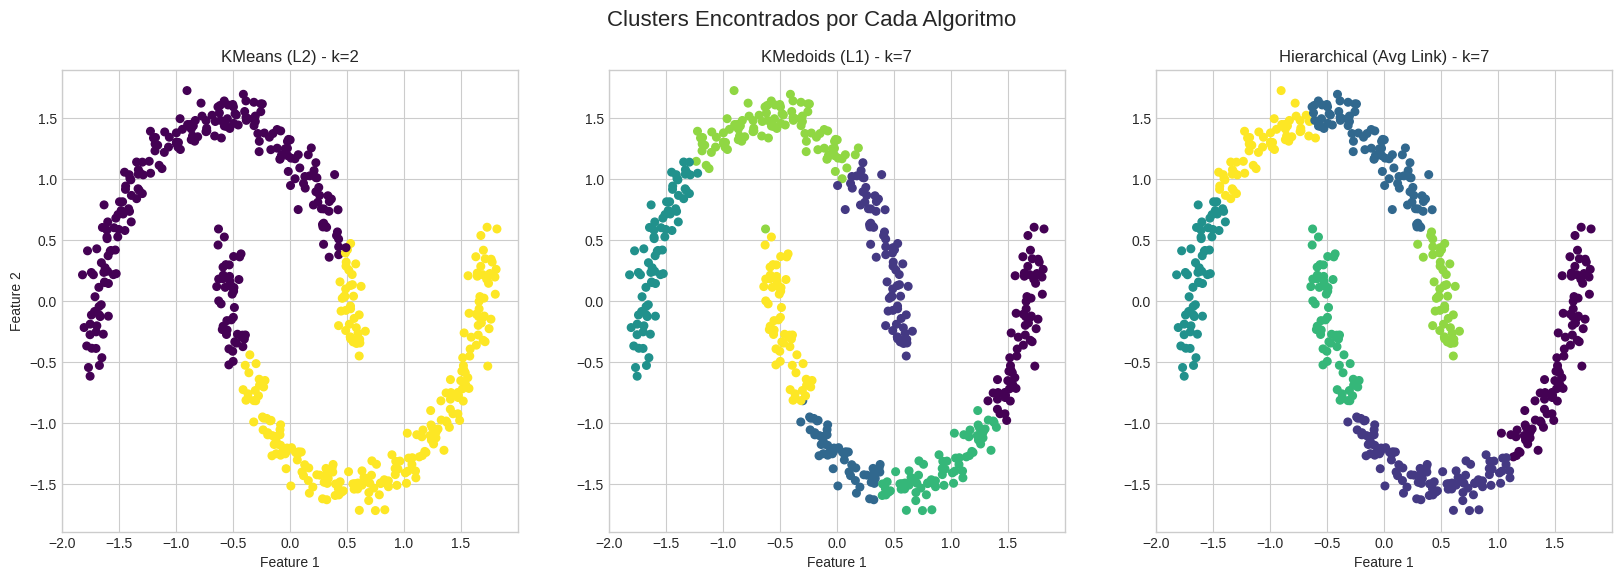

In [209]:

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].scatter(X[:, 0], X[:, 1], c=km_labels, cmap='viridis', s=30)
axs[0].set_title(f'KMeans (L2) - k={best_k_kmeans}')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X[:, 0], X[:, 1], c=kmd_labels, cmap='viridis', s=30)
axs[1].set_title(f'KMedoids (L1) - k={best_k_kmedoids}')
axs[1].set_xlabel('Feature 1')

axs[2].scatter(X[:, 0], X[:, 1], c=hclust_labels, cmap='viridis', s=30)
axs[2].set_title(f'Hierarchical (Avg Link) - k={best_k_hclust}')
axs[2].set_xlabel('Feature 1')

plt.suptitle('Clusters Encontrados por Cada Algoritmo', fontsize=16)
plt.show()

# Interpretação

In [210]:
print("\nInterpretação das métricas para os melhores k:\n")

print(f"KMeans (L2) com k={best_k_kmeans}:")
print(f" - Silhouette Score: {silhouette_score(X, km_labels):.3f}")
print(f" - Davies-Bouldin Score: {davies_bouldin_score(X, km_labels):.3f}")

print(f"\nKMedoids (L1) com k={best_k_kmedoids}:")
print(f" - Silhouette Score: {silhouette_score(X, kmd_labels):.3f}")
print(f" - Davies-Bouldin Score: {davies_bouldin_score(X, kmd_labels):.3f}")

print(f"\nHierarchical (Average Link) com k={best_k_hclust}:")
print(f" - Silhouette Score: {silhouette_score(X, hclust_labels):.3f}")
print(f" - Davies-Bouldin Score: {davies_bouldin_score(X, hclust_labels):.3f}")

print("\nComentários:")
print(" - Silhouette maior indica clusters mais coesos e bem separados.")
print(" - Davies-Bouldin menor indica clusters mais distintos.")
print(" - Hierarchical Clustering pode capturar estruturas arbitrárias melhor que KMeans, especialmente com ligação média.")
print(" - Neste dataset não esférico (make_moons), espera-se que Hierarchical e KMedoids performem melhor que KMeans.")


Interpretação das métricas para os melhores k:

KMeans (L2) com k=2:
 - Silhouette Score: 0.496
 - Davies-Bouldin Score: 0.810

KMedoids (L1) com k=7:
 - Silhouette Score: 0.493
 - Davies-Bouldin Score: 0.658

Hierarchical (Average Link) com k=7:
 - Silhouette Score: 0.483
 - Davies-Bouldin Score: 0.657

Comentários:
 - Silhouette maior indica clusters mais coesos e bem separados.
 - Davies-Bouldin menor indica clusters mais distintos.
 - Hierarchical Clustering pode capturar estruturas arbitrárias melhor que KMeans, especialmente com ligação média.
 - Neste dataset não esférico (make_moons), espera-se que Hierarchical e KMedoids performem melhor que KMeans.


# Teste com Kmeans usando Manhattan, Euclidiano e Mininkowski

##Funções de Distância

##Distância Manhattan L1

In [211]:
def manhattan_distance_pairwise(X, Y):
    """Calcula a distância de Manhattan entre todos os pares de pontos de X e Y."""
    return pairwise_distances(X, Y, metric='manhattan')

##Distância Euclidiana L2

In [212]:
def euclidean_distance_pairwise(X, Y):
    """Calcula a distância Euclidiana entre todos os pares de pontos de X e Y."""
    return pairwise_distances(X, Y, metric='euclidean')

##Distância  Minkowski L3

In [213]:
def minkowski_distance_pairwise(X, Y, p_val=3):
    """Calcula a distância de Minkowski entre todos os pares de pontos de X e Y."""
    return pairwise_distances(X, Y, metric='minkowski', p=p_val)

## Construindo algoritimo Kmeans para generalizar distancia além de L2

### Inicializa 'k' centroides aleatoriamente a partir dos pontos de dados."

In [214]:
def initialize_centroids(X, k):
    """Inicializa 'k' centroides aleatoriamente a partir dos pontos de dados."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

###Atribui cada ponto de dado ao cluster do centroide mais próximo

In [215]:
def assign_clusters_generalized(X, centroids, dist_metric_name, p_val_minkowski=3):
    """Atribui cada ponto de dado ao cluster do centroide mais próximo."""
    if dist_metric_name == 'l1':
        distances_matrix = manhattan_distance_pairwise(X, centroids)
    elif dist_metric_name == 'l2':
        distances_matrix = euclidean_distance_pairwise(X, centroids)
    elif dist_metric_name == 'l3':
        distances_matrix = minkowski_distance_pairwise(X, centroids, p_val=p_val_minkowski)
    else:
        raise ValueError(f"Métrica de distância desconhecida: {dist_metric_name}")
    return np.argmin(distances_matrix, axis=1)

###Atualiza os centroides com base na média ou mediana dos pontos do cluster

In [216]:
def update_centroids_generalized(X, labels, k, dist_metric_name):
    """Atualiza os centroides com base na média ou mediana dos pontos do cluster."""
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            # Reinitialize o centroide se o cluster estiver vazio
            new_centroids[i] = X[np.random.choice(X.shape[0])]
        else:
            if dist_metric_name == 'l1': # K-Medians
                new_centroids[i] = np.median(cluster_points, axis=0)
            elif dist_metric_name == 'l2': # K-Means (média)
                new_centroids[i] = np.mean(cluster_points, axis=0)
            elif dist_metric_name == 'l3': # K-Means com Lp (usando média como aproximação)
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                raise ValueError(f"Métrica de distância desconhecida para atualização de centroide: {dist_metric_name}")
    return new_centroids

###Calcula a Soma dos Quadrados Intra-cluster (WCSS)

In [217]:
def calculate_wcss(X, centroids, labels, dist_metric_name, p_val_minkowski=3):
    """Calcula a Soma dos Quadrados Intra-cluster (WCSS)."""
    wcss = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            centroid_i = centroids[i].reshape(1, -1)
            if dist_metric_name == 'l1':
                dists = manhattan_distance_pairwise(cluster_points, centroid_i)
                wcss += np.sum(dists) # Soma das distâncias L1
            elif dist_metric_name == 'l2': # Inertia padrão (soma das distâncias euclidianas quadradas)
                dists_sq = euclidean_distance_pairwise(cluster_points, centroid_i)**2
                wcss += np.sum(dists_sq)
            elif dist_metric_name == 'l3': # Soma das distâncias de Minkowski elevadas à potência p
                dists = minkowski_distance_pairwise(cluster_points, centroid_i, p_val=p_val_minkowski)
                wcss += np.sum(dists**p_val_minkowski)
            else:
                raise ValueError(f"Métrica de distância desconhecida para WCSS: {dist_metric_name}")
    return wcss

###Executa o algoritmo K-Means generalizado para uma dada métrica de distância

In [218]:
def kmeans_generalized(X, k, dist_metric_name, p_val_minkowski=3, max_iters=100, tol=1e-4):
    """Executa o algoritmo K-Means generalizado para uma dada métrica de distância."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters_generalized(X, centroids, dist_metric_name, p_val_minkowski)
        new_centroids = update_centroids_generalized(X, labels, k, dist_metric_name)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids

    wcss = calculate_wcss(X, centroids, labels, dist_metric_name, p_val_minkowski)
    return centroids, labels, wcss

# Geração de dados sintéticos esfericos(make_blobs) e não esfericos (make_moons)

In [219]:
X_moons, y_moons_true = make_moons(n_samples=300, noise=0.07, random_state=42)
X_blobs, y_blobs_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

datasets = {
    'Moons': (X_moons, y_moons_true, 2), # (Dados, labels verdadeiros, k ideal para visualização)
    'Blobs': (X_blobs, y_blobs_true, 3)
}

#Análise de Métricas (Elbow, Silhouette, Davies-Bouldin)

In [220]:
k_range = range(2, 8)  # Intervalo de k para testar
distance_metrics_config = {
    'L1 (Manhattan)': {'name': 'l1', 'silhouette_metric': 'manhattan'},
    'L2 (Euclidean)': {'name': 'l2', 'silhouette_metric': 'euclidean'},
    'L3 (Minkowski p=3)': {'name': 'l3', 'silhouette_metric': 'minkowski', 'p_val': 3}
}

In [221]:
results_list_2 = []

In [222]:
print("Calculando métricas para diferentes datasets, valores de k e distâncias...")


for dataset_name, (X_data, _, _) in datasets.items():
    print(f"\nProcessando Dataset: {dataset_name}")
    for metric_display_name, metric_params in distance_metrics_config.items():
        print(f"  Avaliando com {metric_display_name}...")
        metric_name_internal = metric_params['name']
        p_val = metric_params.get('p_val', None)
        silhouette_metric_arg = metric_params['silhouette_metric']

        for k_val in k_range:
            centroids, labels, wcss = kmeans_generalized(X_data, k_val, metric_name_internal, p_val_minkowski=p_val if p_val else 3)

            current_silhouette = np.nan
            current_davies_bouldin = np.nan

            if len(np.unique(labels)) > 1: # Métricas são indefinidas para 1 cluster
                # Silhouette Score
                if silhouette_metric_arg == 'minkowski':
                    current_silhouette = silhouette_score(X_data, labels, metric=silhouette_metric_arg, p=p_val if p_val else 3)
                else:
                    current_silhouette = silhouette_score(X_data, labels, metric=silhouette_metric_arg)

                # Davies-Bouldin Score
                current_davies_bouldin = davies_bouldin_score(X_data, labels)

            results_list_2.append({
                'Dataset': dataset_name,
                'k': k_val,
                'Distancia': metric_display_name,
                'WCSS': wcss,
                'Silhouette': current_silhouette,
                'Davies-Bouldin': current_davies_bouldin
            })

Calculando métricas para diferentes datasets, valores de k e distâncias...

Processando Dataset: Moons
  Avaliando com L1 (Manhattan)...
  Avaliando com L2 (Euclidean)...
  Avaliando com L3 (Minkowski p=3)...

Processando Dataset: Blobs
  Avaliando com L1 (Manhattan)...
  Avaliando com L2 (Euclidean)...
  Avaliando com L3 (Minkowski p=3)...


In [223]:
results_df_2 = pd.DataFrame(results_list_2)
results_df_2

,Dataset,k,Distancia,WCSS,Silhouette,Davies-Bouldin
0,Moons,2,L1 (Manhattan),226.020593,0.484211,0.787460
1,Moons,3,L1 (Manhattan),186.624877,0.404281,0.875472
2,Moons,4,L1 (Manhattan),160.280935,0.394481,1.129449
3,Moons,5,L1 (Manhattan),124.482490,0.458092,0.720019
4,Moons,6,L1 (Manhattan),115.824569,0.427361,0.767688
5,Moons,7,L1 (Manhattan),93.756649,0.501340,0.594597
6,Moons,2,L2 (Euclidean),122.367359,0.484947,0.780715
7,Moons,3,L2 (Euclidean),80.617914,0.428531,0.872231
8,Moons,4,L2 (Euclidean),53.235225,0.447855,0.790719
9,Moons,5,L2 (Euclidean),40.773514,0.474009,0.699416


In [224]:
results_df_sorted_2 = results_df.sort_values(
    by=['Silhouette', 'Davies-Bouldin'],
    ascending=[False, True]  # False para Silhouette (decrescente), True para Davies-Bouldin (crescente)
)

In [225]:
results_df_sorted_2

,Dataset,k,Distancia,WCSS,Silhouette,Davies-Bouldin
25,Blobs,3,L2 (Euclidean),566.859551,0.848030,0.212316
24,Blobs,2,L2 (Euclidean),5763.464789,0.704944,0.435955
18,Blobs,2,L1 (Manhattan),1601.916452,0.690325,0.435955
33,Blobs,5,L3 (Minkowski p=3),660.091278,0.681932,0.605457
20,Blobs,4,L1 (Manhattan),428.039769,0.672819,0.737877
32,Blobs,4,L3 (Minkowski p=3),752.699891,0.652549,0.735135
30,Blobs,2,L3 (Minkowski p=3),63526.892388,0.522350,0.760166
34,Blobs,6,L3 (Minkowski p=3),525.550992,0.522118,0.833072
21,Blobs,5,L1 (Manhattan),393.941798,0.521602,0.935991
26,Blobs,4,L2 (Euclidean),5641.507139,0.519227,0.753623


In [226]:
results_df_sorted_2.groupby(['Dataset', 'Distancia']).head(1)

,Dataset,k,Distancia,WCSS,Silhouette,Davies-Bouldin
25,Blobs,3,L2 (Euclidean),566.859551,0.848030,0.212316
18,Blobs,2,L1 (Manhattan),1601.916452,0.690325,0.435955
33,Blobs,5,L3 (Minkowski p=3),660.091278,0.681932,0.605457
17,Moons,7,L3 (Minkowski p=3),6.742841,0.496562,0.596466
5,Moons,7,L1 (Manhattan),95.794767,0.496041,0.603665
10,Moons,6,L2 (Euclidean),28.646900,0.488764,0.639045


#Plotar Métricas

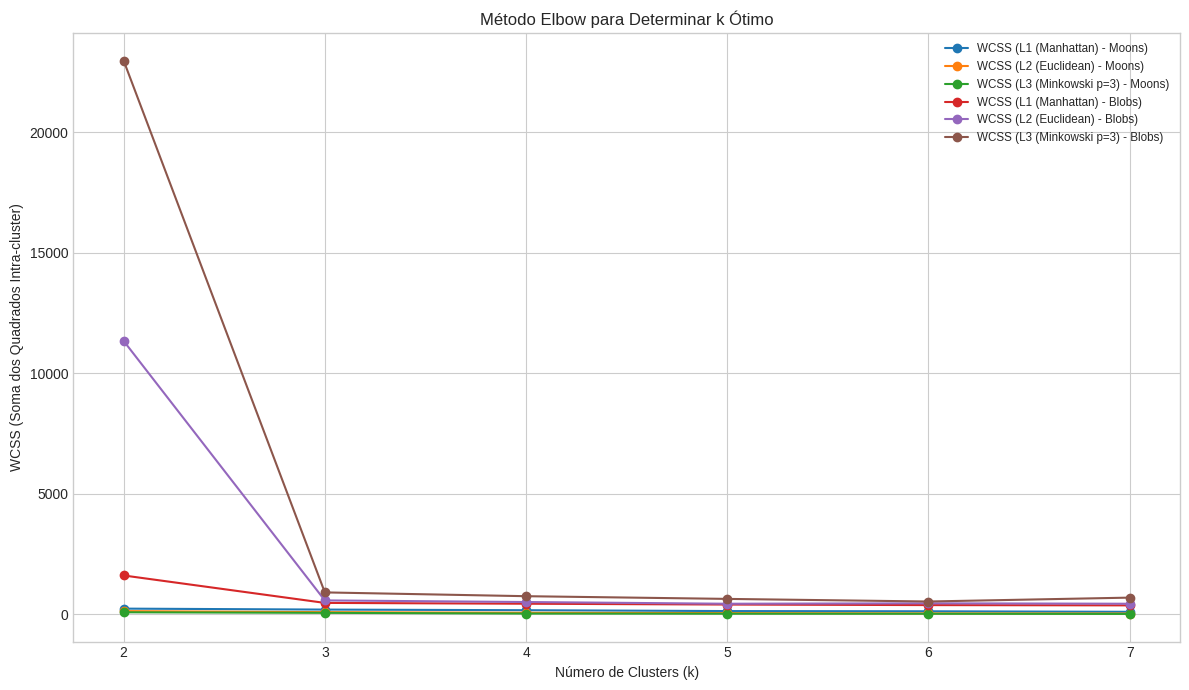

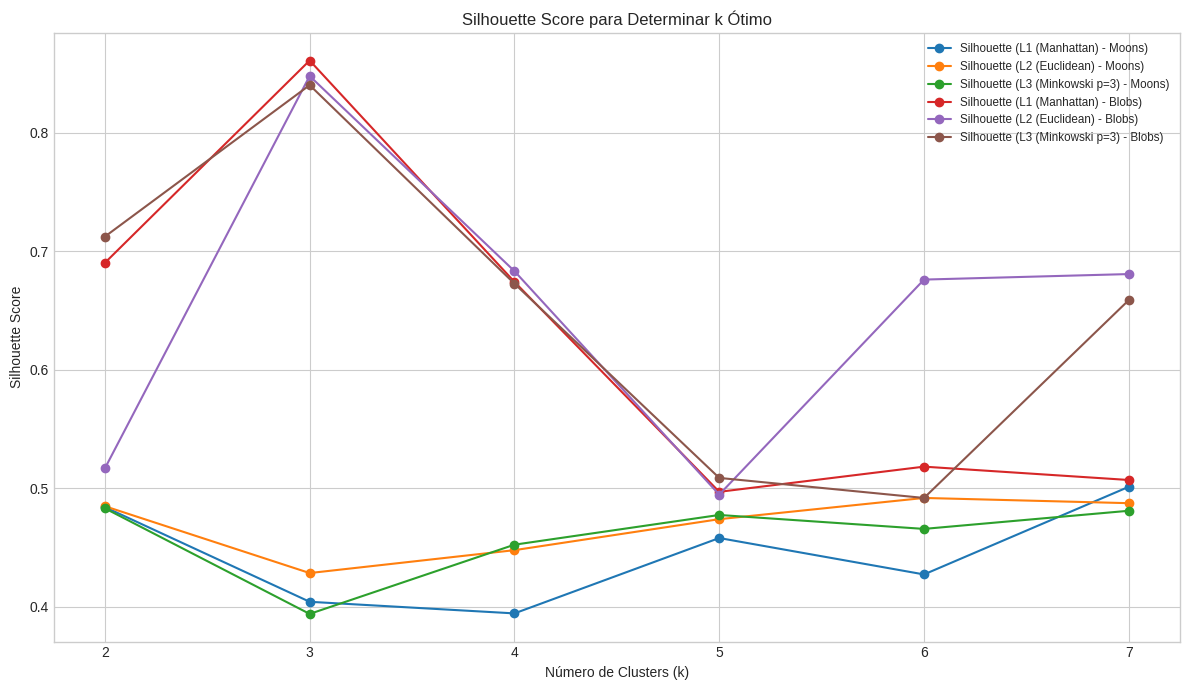

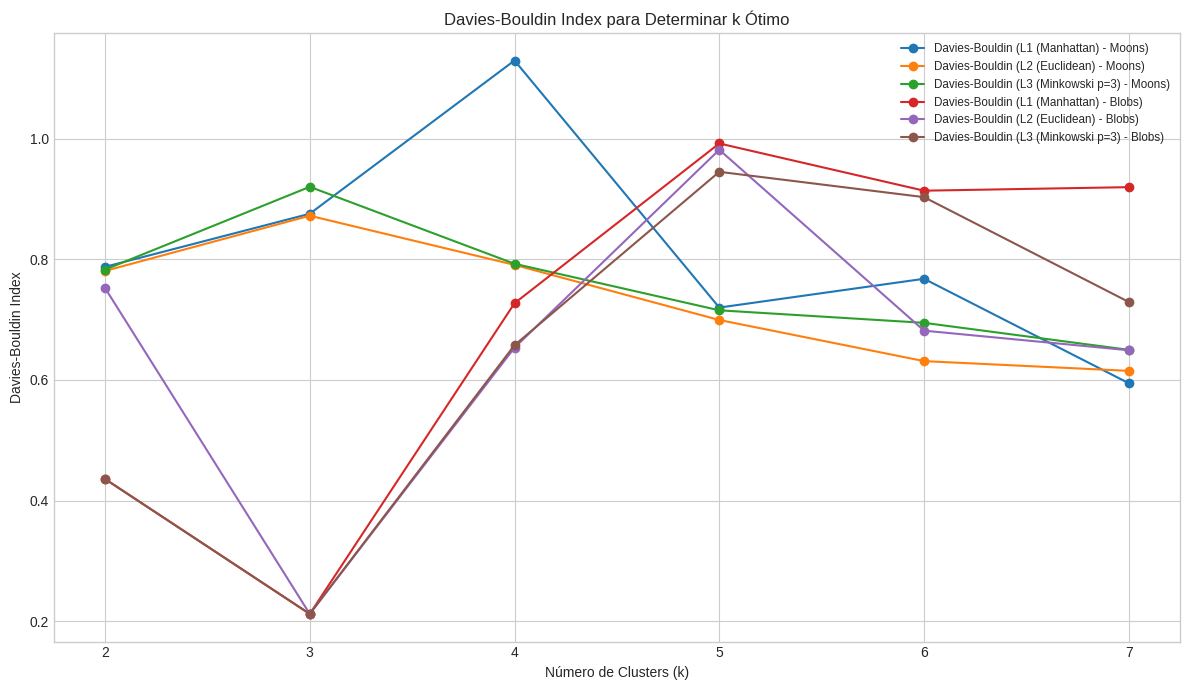

In [227]:
plt.style.use('seaborn-v0_8-whitegrid')

metric_plot_config = [
    ('WCSS', 'WCSS (Soma dos Quadrados Intra-cluster)', 'Método Elbow para Determinar k Ótimo'),
    ('Silhouette', 'Silhouette Score', 'Silhouette Score para Determinar k Ótimo'),
    ('Davies-Bouldin', 'Davies-Bouldin Index', 'Davies-Bouldin Index para Determinar k Ótimo')
]

for metric_col, y_label, title in metric_plot_config:
    plt.figure(figsize=(12, 7))
    for dataset_name in datasets.keys():
        for metric_display_name in distance_metrics_config.keys():
            subset = results_df_2[
                (results_df_2['Dataset'] == dataset_name) &
                (results_df_2['Distancia'] == metric_display_name)
            ]
            if not subset.empty:
                 plt.plot(subset['k'], subset[metric_col], marker='o', linestyle='-',
                          label=f'{metric_col} ({metric_display_name} - {dataset_name})')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(list(k_range))
    plt.legend(loc='best', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plot da Clusterização


--- Visualização da Clusterização ---


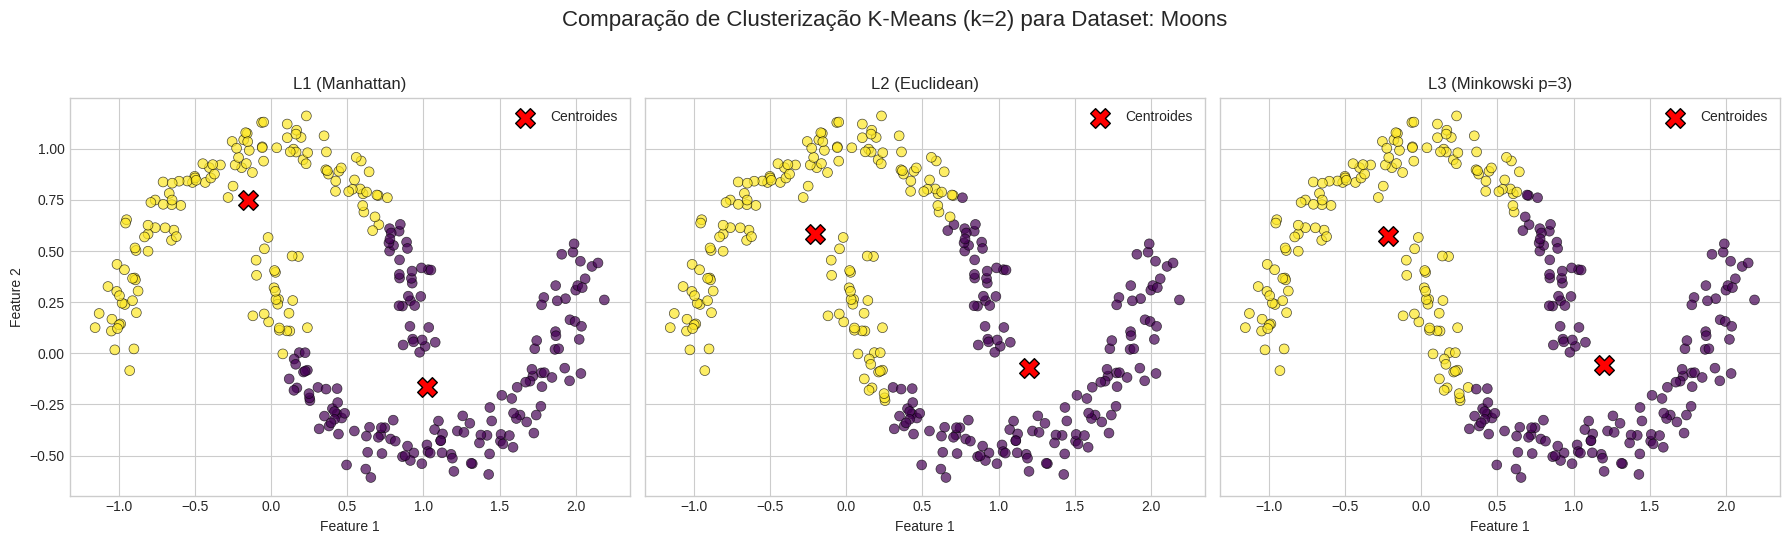

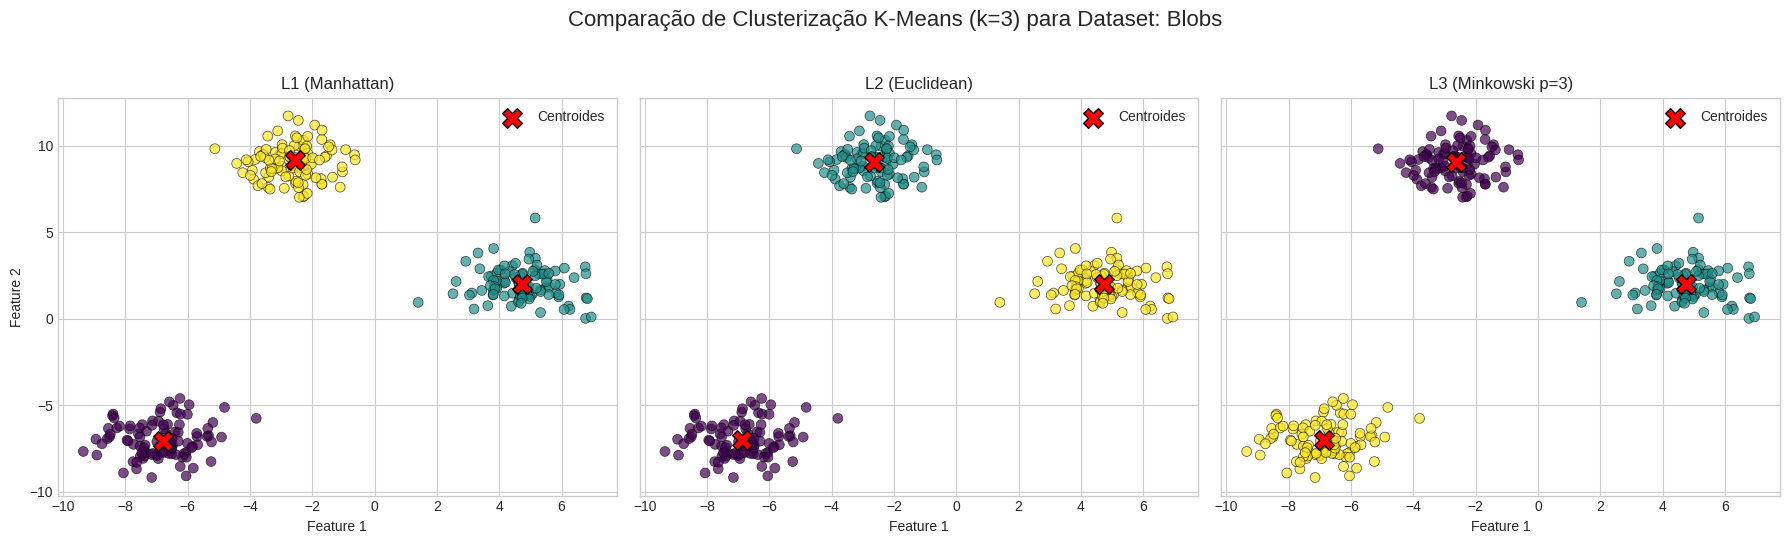

In [228]:
for dataset_name, (X_data, _, k_viz) in datasets.items():
    fig, axes = plt.subplots(1, len(distance_metrics_config), figsize=(18, 5.5), sharey=True)
    fig.suptitle(f'Comparação de Clusterização K-Means (k={k_viz}) para Dataset: {dataset_name}', fontsize=16)

    for i, (metric_display_name, metric_params) in enumerate(distance_metrics_config.items()):
        metric_name_internal = metric_params['name']
        p_val = metric_params.get('p_val', None)

        centroids, labels, _ = kmeans_generalized(X_data, k_viz, metric_name_internal, p_val_minkowski=p_val if p_val else 3)

        ax = axes[i]
        scatter = ax.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k', linewidth=0.5)
        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides', edgecolors='black')
        ax.set_title(f'{metric_display_name}')
        ax.set_xlabel('Feature 1')
        if i == 0:
            ax.set_ylabel('Feature 2')
        ax.legend()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta para o suptitle
    plt.show()
